# Bank Marketing Analysis


The Bank Marketing dataset is collected from a direct marketing campaign of a bank institution from Portugal. The dataset was obtained from the UCI Machine Learning Repository through the following link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The marketing campaigns consisted of phone calls to their clients in order to promote and sign clients up to a term deposit with their bank. The campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. After each call, they are recorded as no (the client did not make a deposit) or yes (the client accepted to make a deposit).

The purpose of this project is to predict if a call to a client would be successful or not based on client details.

In addition, feature importance as described by the model with the best performance will be ascertained in order to understand what client attributes are most important in determining success rate of bank telemarketing.

## 1. Loading the data

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("data/bank-additional-full.csv",sep=';')
print(df.shape)
df.head()

(41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

From the UCI Machine Learning Repository website, the attribute information given is as follows:     
Input variables:      
**bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')    

**related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.     

**other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')     

**social and economic context attributes:**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

As shown in the attribute information, the duration variable will only be known at the end of the call, hence, at that time the outcome of the call will be known. To avoid data leakage that affects model performance, the 'duration' variable will be dropped.

In [4]:
df = df.drop(['duration'],axis=1)

## 2. Exploratory Analysis

Variables are of the following types:  
1. Categorical: job, marital, education, default, loan, contact, month, day_of_week, poutcome, y (a binary classification task)
2. Numeric: age, campaign, days, previous, emp.var.rate, cons.price.idx, euibor3m, nr.employed

### Categorical Variables:

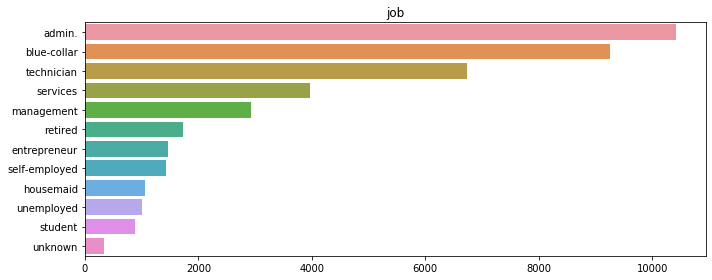

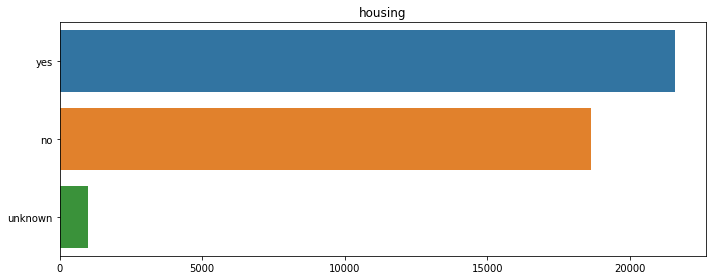

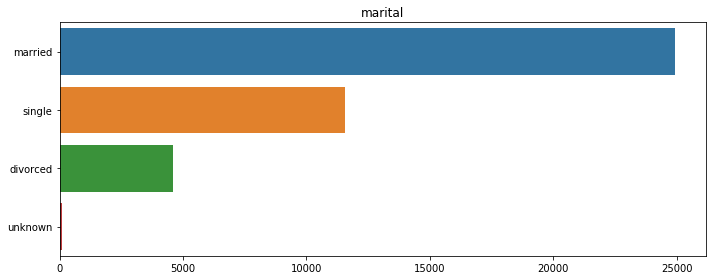

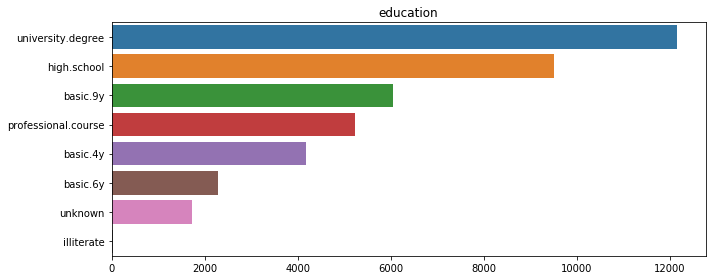

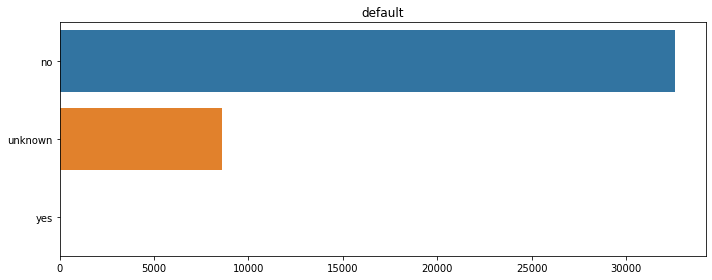

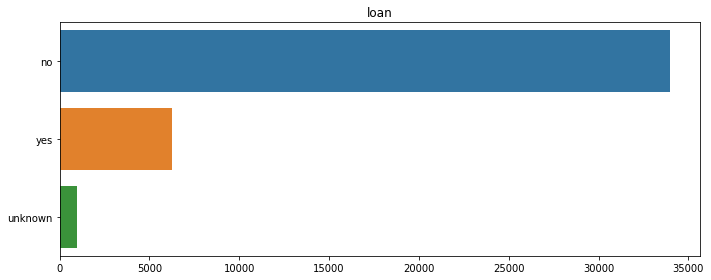

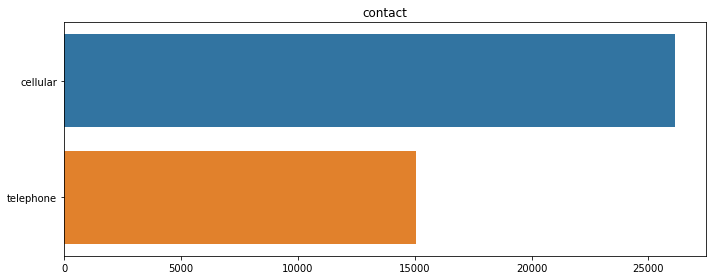

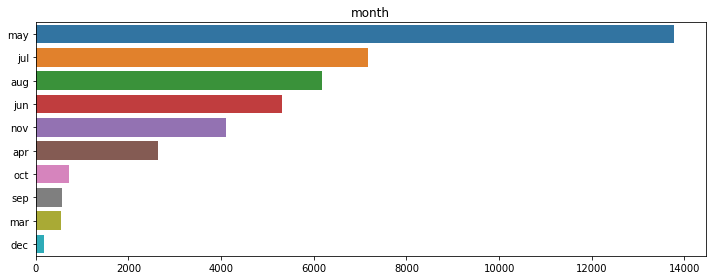

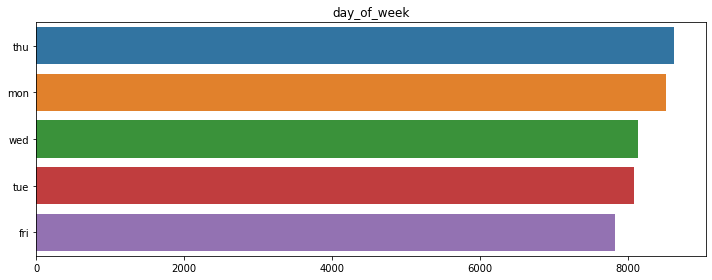

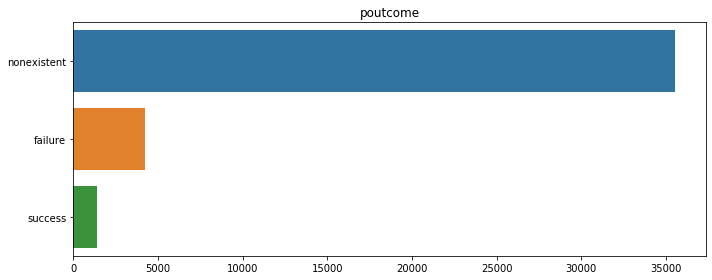

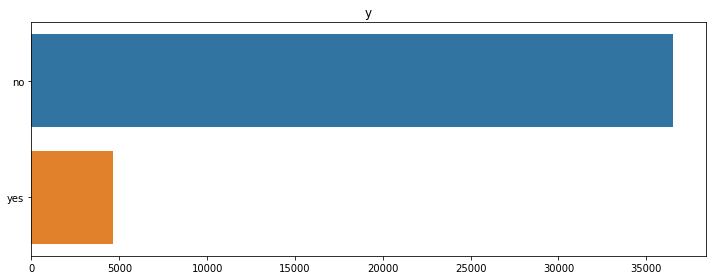

In [6]:
categorical_variables = ['job', 'housing', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

From the 'y' feature plot, it can be seen that the data is unbalanced. The outcome of importance is the positive outcome - the task is to understand the features that are important in predicting the success of a direct marketing campaign on getting a customer to subscribe to a term deposit.

Therefore, a technique will be method will need to be utilised to balance classes to train classifiers with.

### List of normalised relative frequency of the target class per category.

Normalised distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favours clients that will subscribe and negative values categories that favour not buying the product.

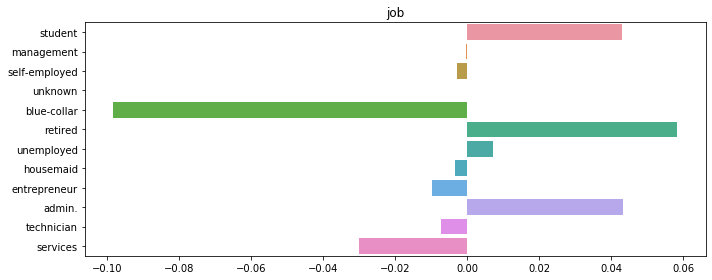

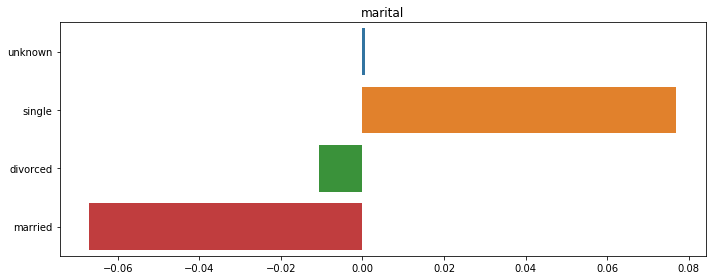

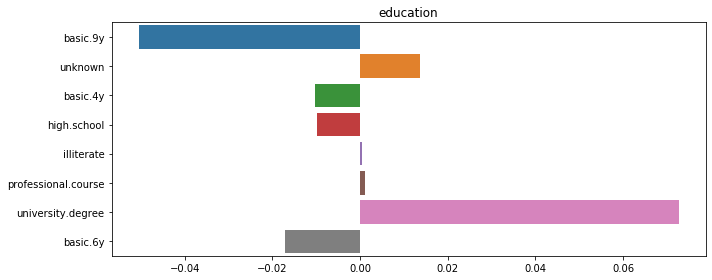

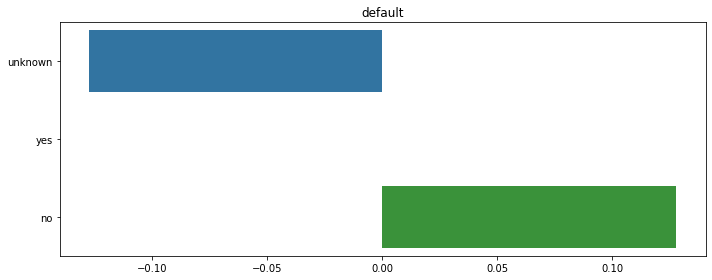

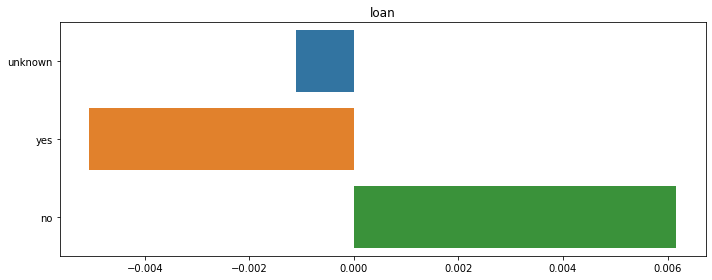

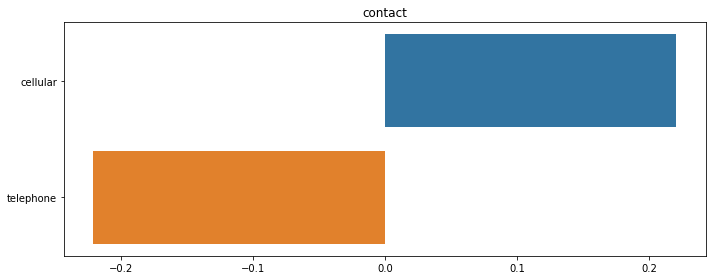

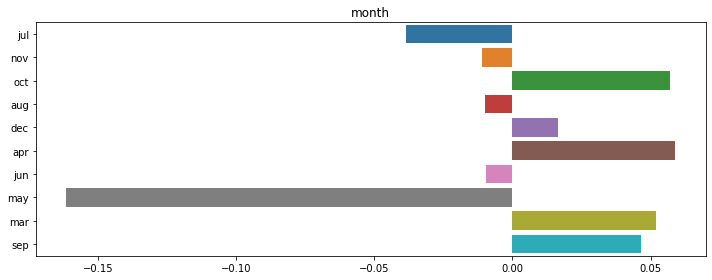

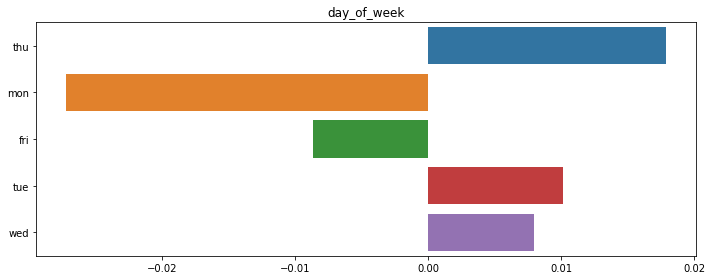

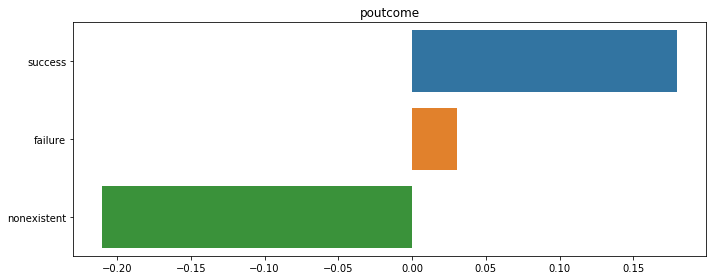

In [7]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

There are quite a significant number of unknowns in the categorical variables answers, including loan, default, education, job. At least some of these unknowns can be inferred from other variables.

In [8]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [9]:
cross_tab(df,'job','education')

basic.4y  high.school  basic.6y  basic.9y  professional.course  \
admin.               77         3329       151       499                  363   
blue-collar        2318          878      1426      3623                  453   
entrepreneur        137          234        71       210                  135   
housemaid           474          174        77        94                   59   
management          100          298        85       166                   89   
retired             597          276        75       145                  241   
self-employed        93          118        25       220                  168   
services            132         2682       226       388                  218   
student              26          357        13        99                   43   
technician           58          873        87       384                 3320   
unemployed          112          259        34       186                  142   
unknown              52           37        22        31                   12   

               unknown  university.degree  illiterate  
admin.             249               5753         1.0  
blue-collar        454                 94         8.0  
entrepreneur        57                610         2.0  
housemaid           42                139         1.0  
management         123               2063         0.0  
retired             98                285         3.0  
self-employed       29                765         3.0  
services           150                173         0.0  
student            167                170         0.0  
technician         212               1809         0.0  
unemployed          19                262         0.0  
unknown            131                 45         0.0

In [10]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

From the above, when job or education is unknown, the most common of the other variable will be imputed.

Furthermore, if age is over 60, it can be inferred that they are retired as this is the most common corresponding job category.

Note, these inferences may not hold for all unknowns, but they are realistic inferences to make based on the data.

In [11]:
df.loc[(df['age'] > 60) & (df['job'] == 'unknown'), 'job'] = 'retired'

df.loc[(df['education'] == 'unknown') & (df['job'] == 'management'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'services'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'housemaid'), 'education'] = 'basic.4y'

df.loc[(df['job'] == 'unknown') & (df['education'] == 'basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education'] == 'basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education'] == 'basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education'] == 'professional.course'), 'job'] = 'technician'

In [12]:
cross_tab(df,'job','housing')

no   yes  unknown
job                               
admin.         4636  5559      227
blue-collar    4362  4752      241
entrepreneur    641   779       36
housemaid       491   540       29
management     1363  1490       71
retired         789   908       44
self-employed   641   740       40
services       1818  2050      101
student         381   471       23
technician     2985  3621      147
unemployed      430   557       27
unknown          85   109        4

In [13]:
cross_tab(df,'job','loan')

no   yes  unknown
job                               
admin.         8485  1710      227
blue-collar    7730  1384      241
entrepreneur   1214   206       36
housemaid       877   154       29
management     2414   439       71
retired        1452   245       44
self-employed  1186   195       40
services       3267   601      101
student         710   142       23
technician     5615   991      147
unemployed      838   149       27
unknown         162    32        4

Unknowns in loan and housing variables will be changed to the most common based on their job.

In [14]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

In [15]:
#Function to fill via cross-tabulation missing values for housing
def fillhousing(df,jobhousing):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [16]:
#Function to fill via cross-tabulation missing values for loan
def fillloan(df,jobloan):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [17]:
df = fillhousing(df,jobhousing)
df = fillloan(df,jobloan)

### Numeric variables:

In [18]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50.800000      0.634000   4963.600000  
25%         93.075000     -42.700000      1.344000   5099.100000  
50%         93.749000     -41.800000      4.857000   5191.000000  
75%         93.994000     -36.400000      4.961000   5228.100000  
max         94.767000     -26.900000      5.045000   5228.100000

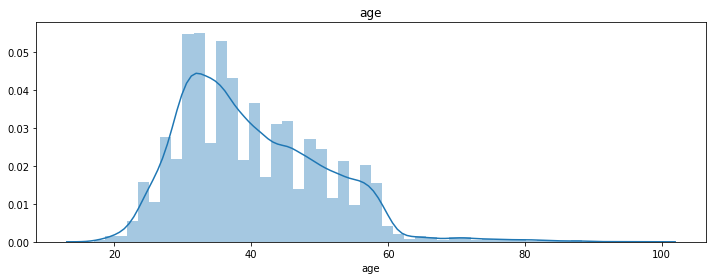

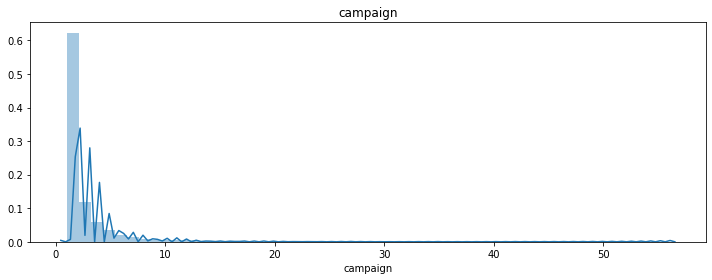

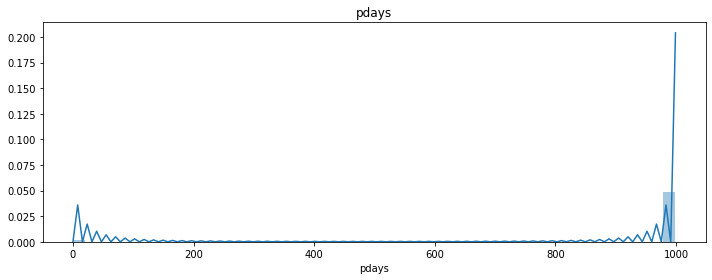

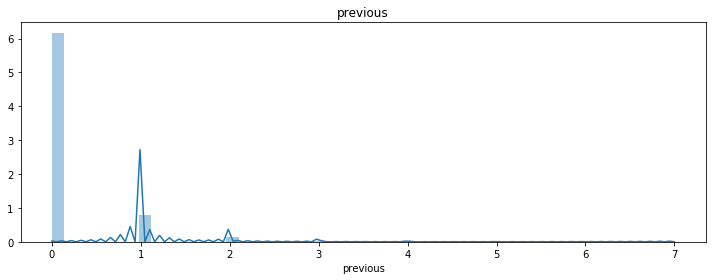

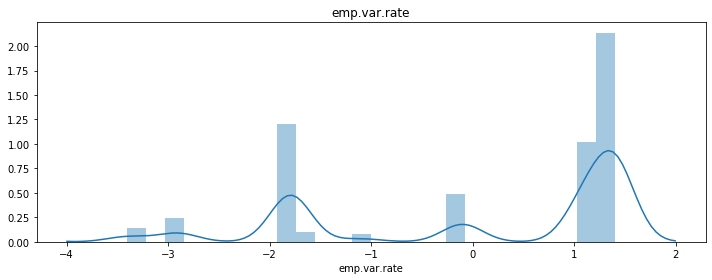

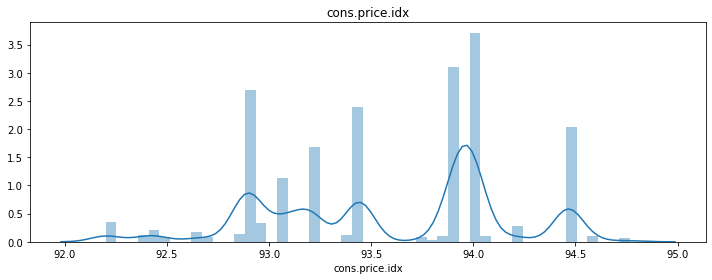

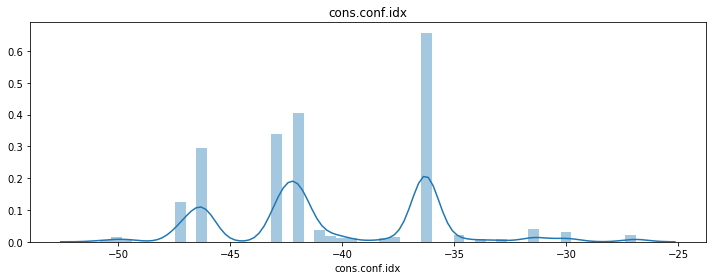

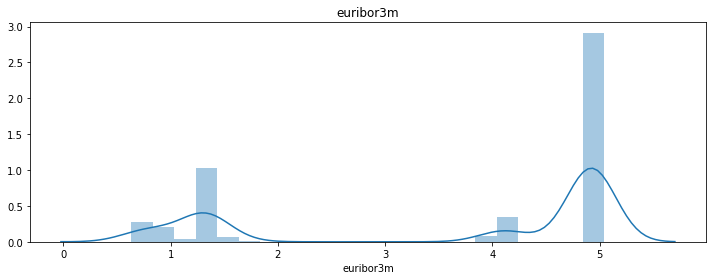

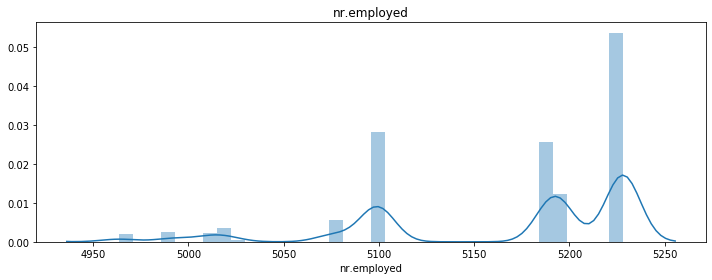

In [19]:
for var in numerical_variables:
    plt.figure(figsize=(10,4))
    sns.distplot(df[var])
    plt.title(var)
    plt.tight_layout()

Missing Values: NaNs are encoded as '999'. From the above, only 'pdays' have missing values in the numeric variables, and a majority of the values for 'pdays' are missing.

Outliers: Outliers are 1.5 x Q3 value (75th percentile). From the above, only 'age' and 'campaign' have outliers. But the value of these outliers are not so unrealistic (max('age') = 98 and max('campaign') = 56), so they do not need to be removed. 

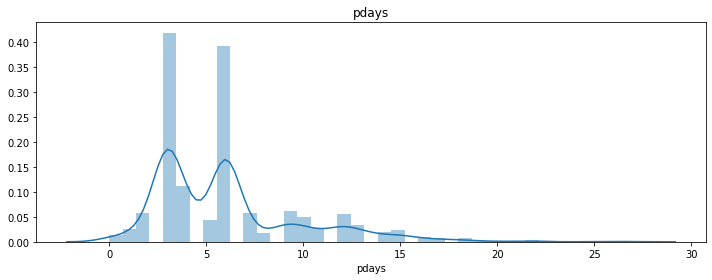

In [20]:
pdays = df[df['pdays'] != 999]

plt.figure(figsize=(10,4))
sns.distplot(pdays['pdays'])
plt.title('pdays')
plt.tight_layout()

In [21]:
pd.crosstab(df['pdays'], df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome   failure  nonexistent   success
pdays                                    
0         0.000000     0.000000  0.000364
1         0.000000     0.000000  0.000631
2         0.000000     0.000000  0.001481
3         0.000097     0.000000  0.010561
4         0.000049     0.000000  0.002816
5         0.000097     0.000000  0.001020
6         0.000607     0.000000  0.009396
7         0.000364     0.000000  0.001093
8         0.000146     0.000000  0.000291
9         0.000583     0.000000  0.000971
10        0.000170     0.000000  0.001093
11        0.000073     0.000000  0.000607
12        0.000316     0.000000  0.001093
13        0.000194     0.000000  0.000680
14        0.000121     0.000000  0.000364
15        0.000219     0.000000  0.000364
16        0.000049     0.000000  0.000219
17        0.000121     0.000000  0.000073
18        0.000121     0.000000  0.000049
19        0.000024     0.000000  0.000049
20        0.000024     0.000000  0.000000
21        0.000049     0.000000  0.000000
22        0.000000     0.000000  0.000073
25        0.000024     0.000000  0.000000
26        0.000000     0.000000  0.000024
27        0.000000     0.000000  0.000024
999       0.099786     0.863431  0.000000

Crosstab shows that the majority of pdays is 999, or NaN, and so missing, and that these occur when poutcome is 'nonexistent', which means that the customer has not been contacted previously. 

Therefore, pdays will be split into 2 features: (1) binary categorical feature with 0 if the custmer has not been contacted before (999) and 1 otherwise; (2) if pdays is 999, this is changed to 30 as this is still larger than the largest value for those that have been contacted, but reduces the effect of the large 999 value.

In [22]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays'] == 999):
        return 0;
    return 1;

df['pdays2'] = df.apply(lambda row: function(row),axis=1)

#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];

df['pdays'] = df.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
df['pdays'] = df['pdays'].astype(int)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...     30         0  nonexistent          1.1   
1   may         mon  ...     30         0  nonexistent          1.1   
2   may         mon  ...     30         0  nonexistent          1.1   
3   may         mon  ...     30         0  nonexistent          1.1   
4   may         mon  ...     30         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y pdays2  
0          93.994          -36.4      4.857       5191.0  no      0  
1          93.994          -36.4      4.857       5191.0  no      0  
2          93.994          -36.4      4.857       5191.0  no      0  
3          93.994          -36.4      4.857       5191.0  no      0  
4          93.994          -36.4      4.857       5191.0  no      0  

[5 rows x 21 columns]

## 3. Data Preparation

### Categorical variables

As Random Forest can handle categorical features matively, the categorical features will be label encoded.

For other classifiers, one hot encoding will be necessary

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import category_encoders as ce

In [24]:
df.loc[(df['y'] == 'no'), 'y'] = 0
df.loc[(df['y'] == 'yes'), 'y'] = 1

In [25]:
#label encoding
df_le = df.copy()
le = preprocessing.LabelEncoder()
df_le['job'] = le.fit_transform(df_le['job'])
df_le['marital'] = le.fit_transform(df_le['marital'])
df_le['education'] = le.fit_transform(df_le['education'])
df_le['default'] = le.fit_transform(df_le['default'])
df_le['housing'] = le.fit_transform(df_le['housing'])
df_le['loan'] = le.fit_transform(df_le['loan'])
df_le['contact'] = le.fit_transform(df_le['contact'])
df_le['month'] = le.fit_transform(df_le['month'])
df_le['day_of_week'] = le.fit_transform(df_le['day_of_week'])
df_le['poutcome'] = le.fit_transform(df_le['poutcome'])
df_le.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0            1  ...     30         0         1           1.1          93.994   
1            1  ...     30         0         1           1.1          93.994   
2            1  ...     30         0         1           1.1          93.994   
3            1  ...     30         0         1           1.1          93.994   
4            1  ...     30         0         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  pdays2  
0          -36.4      4.857       5191.0  0       0  
1          -36.4      4.857       5191.0  0       0  
2          -36.4      4.857       5191.0  0       0  
3          -36.4      4.857       5191.0  0       0  
4          -36.4      4.857       5191.0  0       0  

[5 rows x 21 columns]

In [26]:
#one-hot encoding
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
categorical_variables = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_ohe = pd.get_dummies(df, columns=categorical_variables)
df_ohe.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1     30         0           1.1          93.994   
1   57         1     30         0           1.1          93.994   
2   37         1     30         0           1.1          93.994   
3   40         1     30         0           1.1          93.994   
4   56         1     30         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  0  ...          0          0   
1          -36.4      4.857       5191.0  0  ...          0          0   
2          -36.4      4.857       5191.0  0  ...          0          0   
3          -36.4      4.857       5191.0  0  ...          0          0   
4          -36.4      4.857       5191.0  0  ...          0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
1                0                 0                     1                 0  
2                0                 0                     1                 0  
3                0                 0                     1                 0  
4                0                 0                     1                 0  

[5 rows x 64 columns]

### Split into train and test set before scaling the numeric data 

Splitting will be done first as fit_transform will be used on train and transform on test to avoid unseen data influencing the scaling.

Using random_state 42 will ensure the same samples in train and test set of both ohe and le

Stratification (keeping the target distribution unchanged) used since dataset is highly imbalanced. A random train/test split may change the target distribution quite a bit.

In [27]:
from sklearn.model_selection import train_test_split

train_le, test_le = train_test_split(df_le, train_size=0.8, stratify=df_le.y.values, random_state=42)
print('Original:', (df_le.y).mean(), 'Train:', (train_le.y).mean(), 'Test:', (test_le.y).mean())

Original: 0.11265417111780131 Train: 0.11265553869499241 Test: 0.11264870114105366


In [28]:
train_ohe, test_ohe = train_test_split(df_ohe, train_size=0.8, stratify=df_ohe.y.values, random_state=42)
print('Original:', (df_ohe.y).mean(), 'Train:', (train_ohe.y).mean(), 'Test:', (test_ohe.y).mean())

Original: 0.11265417111780131 Train: 0.11265553869499241 Test: 0.11264870114105366


### Numeric variables
As shown in the above exploration, the numeric variable ranges differ and are not evenly distributed. Therefore, the values of these features need to standardised.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
#scale label encoded df
scaler = MinMaxScaler()
train_le[numerical_variables] = scaler.fit_transform(train_le[numerical_variables])
test_le[numerical_variables] = scaler.transform(test_le[numerical_variables])

In [31]:
#scale ohe df
scaler = MinMaxScaler()
train_ohe[numerical_variables] = scaler.fit_transform(train_ohe[numerical_variables])
test_ohe[numerical_variables] = scaler.transform(test_ohe[numerical_variables])

In [32]:
#separating X and Y for test and train for le and ohe
X_train_le = train_le.drop(['y'], axis=1)
Y_train_le = train_le[['y']]

X_test_le = test_le.drop(['y'], axis=1)
Y_test_le = test_le[['y']]

In [33]:
X_train_ohe = train_ohe.drop(['y'], axis=1)
Y_train_ohe = train_ohe[['y']]

X_test_ohe = test_ohe.drop(['y'], axis=1)
Y_test_ohe = test_ohe[['y']]

## 4. SMOTE: Synthetic Minority Over-Sampling Technique

Given the importance of the positive outcomes for this analysis, and the unbalanced nature of the outcomes (there are substantially more 'no' repsonses than 'yes' responses), SMOTE will be used to oversample the minority class.

In [34]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [35]:
smote = SMOTE(random_state=42)

In [36]:
X_res_le, Y_res_le = smote.fit_resample(X_train_le, Y_train_le)

X_res_ohe, Y_res_ohe = smote.fit_resample(X_train_ohe, Y_train_ohe)

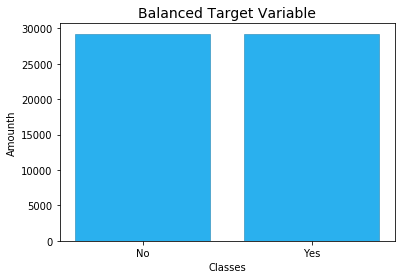

In [37]:
plt.bar(['No','Yes'], [sum(Y_res_le), len(Y_res_le)-sum(Y_res_le)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amounth')
plt.show()

In [39]:
X_train_l = pd.DataFrame(X_res_le, columns=X_train_le.columns)
Y_train_l = pd.DataFrame(Y_res_le, columns=Y_train_le.columns)

X_train_o = pd.DataFrame(X_res_ohe, columns=X_train_ohe.columns)
Y_train_o = pd.DataFrame(Y_res_ohe, columns=Y_train_ohe.columns)

In [68]:
#save both sets of datasets
X_train_l.to_csv('data/X_train_le.csv', index=False)
X_test_le.to_csv('data/X_test_le.csv', index=False)
Y_train_l.to_csv('data/Y_train_le.csv', index=False)
Y_test_le.to_csv('data/Y_test_le.csv', index=False)

X_train_o.to_csv('data/X_train_ohe.csv', index=False)
X_test_ohe.to_csv('data/X_test_ohe.csv', index=False)
Y_train_o.to_csv('data/Y_train_ohe.csv', index=False)
Y_test_ohe.to_csv('data/Y_test_ohe.csv', index=False)

## 5. Building Models

A number of models will be tested with the data, including:
+ Support Vector Machine (SVM)
+ Random Forest
+ Logisitic Regression with Linear Features
+ Logisitic Regression with Polynomial Features of degree 2
+ Logisitic Regression with Polynomial Features of degree 3
+ XGBoost Classifier
+ Gradient Boosting Classifier
+ Ada Boost

Dimensionality reduction?????

First, using stratified kfold cross validation, the optimal parameters for classifiers will be determined. Then, classifier performance will be determined on the train set using kfold cross validation once again.    

Below are functions for determining the best classifier and parameters:
+ kfold_classification performs stratified kfold on the train data
+ evaluate_classifier_performance evaluates the predictions generated through stratified kfold cross validation

In [142]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [121]:
def kfold_classification(classifier, X, Y):
    
    skf = StratifiedKFold(n_splits = 3, shuffle = True)
    predictions = []
    Y_actual = []
    predicted_prob = []
    
    for train_subset_index, cv_index in skf_model.split(X, Y):
        X_features_subset = X.loc[train_subset_index]
        Y_subset = Y.loc[train_subset_index]
        X_features_cv = X.loc[cv_index]
        Y_cv = Y.loc[cv_index]
                
        model = classifier
        model.fit(X_features_subset, Y_subset)
        pred = model.predict(X_features_cv)
        pred_prob = model.predict_proba(X_features_cv)
        
        predictions.append(pred)
        Y_actual.append(Y_cv)
        predicted_prob.append(pred_prob)
    
    predictions = [item for sublist in predictions for item in sublist]
    predicted_proba = np.array(predicted_prob)
    
    act0, act1, act2 = Y_actual[0], Y_actual[1], Y_actual[2]
    actual = act0.append(act1)
    actual = actual.append(act2)
    
    prob0, prob1, prob2 = predicted_prob[0], predicted_prob[1], predicted_prob[2]

    pred_proba = np.concatenate((prob0, prob1))
    pred_proba = np.concatenate((pred_proba, prob2))
        
    evaluate_classifier_performance(actual, predictions, pred_proba, 'y')

In [76]:
def evaluate_classifier_performance(actual, predictions, predicted_prob, roc_y_n):
    ### Confusion Matrix
    confusion_matrix_train = confusion_matrix(actual, predictions)
    print("\nConfusion Matrix:\n ", confusion_matrix_train)
 
    ### Accuracy score
    acc = accuracy_score(actual, predictions)
    print("\nTraining Accuracy Score: ", acc)
       
    ### Precision, Recall  
    precision = precision_score(actual, predictions)
    print("\nTraining Precision: ", precision)
    
    recall = recall_score(actual, predictions)
    print("\nTraining Recall: ", recall)
    
    ### Classification Report
    print("\nTrain Classification Report: \n",classification_report(actual, predictions))

    ### F1 Score
    f1score = f1_score(actual, predictions)
    print("\nTraining F1score: ", f1score)
    
    f1score_weight = f1_score(actual, predictions, average='weighted')
    print("\nTraining Weigted F1score: ", f1score_weight)
    
    ### ROC-AUC
    if roc_y_n == 'y':
        fpr, tpr, threshold = roc_curve(actual, predicted_prob[:,1])
        roc_auc = auc(fpr, tpr)
        print("\AUC for ROC: ", roc_auc)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Training - Receiver Operating Characteristic')

### 5.1 Support Vector Machine

In [77]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [78]:
### Support Vector Machine Model

C_list = np.linspace(0.5, 2.2, 5)
gamma_list = np.linspace(0.01, 0.05, 5)

skf_model = StratifiedKFold(n_splits = 3, shuffle = True)

max_iterations = 3
for t in range(0, max_iterations):
    print("---Iteration: ",t)
    AVG_ACC = np.zeros(shape = [len(C_list), len(gamma_list)])
    STD_ACC = np.zeros(shape = [len(C_list), len(gamma_list)])
    
    x_count = 0
    for c_value in C_list:
        
        y_count = 0
        for gamma_value in gamma_list:
            print(c_value, gamma_value)

            temp_accuracy_list = []
            for train_subset_index, cv_index in skf_model.split(X_train, Y_train):
                df_train_features_subset = X_train.loc[train_subset_index]
                df_train_class_subset = Y_train.loc[train_subset_index]
                df_train_features_cv = X_train.loc[cv_index]
                df_train_class_cv = Y_train.loc[cv_index]
                
                svm_model = SVC(C = c_value, gamma = gamma_value, kernel = 'rbf')
                svm_model.fit(df_train_features_subset, df_train_class_subset)
                score_value = svm_model.score(df_train_features_cv, df_train_class_cv)
                temp_accuracy_list.append(score_value)
            
            AVG_ACC[x_count, y_count] = np.mean(temp_accuracy_list)
            STD_ACC[x_count, y_count] = np.std(temp_accuracy_list)
            y_count += 1
            
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis=2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis=None), final_accuracy_mean_list.shape)

chosen_C = C_list[max_ind[0]]
chosen_gamma = gamma_list[max_ind[1]]

print("By Cross Validation - Chosen C for SVM: ", chosen_C)
print("By Cross Validation - Chosen Gamma for SVM: ", chosen_gamma)

---Iteration:  0
0.5 0.01
0.5 0.02
0.5 0.03
0.5 0.04
0.5 0.05
0.925 0.01
0.925 0.02
0.925 0.03
0.925 0.04
0.925 0.05
1.35 0.01
1.35 0.02
1.35 0.03
1.35 0.04
1.35 0.05
1.7750000000000001 0.01
1.7750000000000001 0.02
1.7750000000000001 0.03
1.7750000000000001 0.04
1.7750000000000001 0.05
2.2 0.01
2.2 0.02
2.2 0.03
2.2 0.04
2.2 0.05
---Iteration:  1
0.5 0.01
0.5 0.02
0.5 0.03
0.5 0.04
0.5 0.05
0.925 0.01
0.925 0.02
0.925 0.03
0.925 0.04
0.925 0.05
1.35 0.01
1.35 0.02
1.35 0.03
1.35 0.04
1.35 0.05
1.7750000000000001 0.01
1.7750000000000001 0.02
1.7750000000000001 0.03
1.7750000000000001 0.04
1.7750000000000001 0.05
2.2 0.01
2.2 0.02
2.2 0.03
2.2 0.04
2.2 0.05
---Iteration:  2
0.5 0.01
0.5 0.02
0.5 0.03
0.5 0.04
0.5 0.05
0.925 0.01
0.925 0.02
0.925 0.03
0.925 0.04
0.925 0.05
1.35 0.01
1.35 0.02
1.35 0.03
1.35 0.04
1.35 0.05
1.7750000000000001 0.01
1.7750000000000001 0.02
1.7750000000000001 0.03
1.7750000000000001 0.04
1.7750000000000001 0.05
2.2 0.01
2.2 0.02
2.2 0.03
2.2 0.04
2.2 0.05
By C


Confusion Matrix:
  [[27374  1864]
 [ 4923 24315]]

Training Accuracy Score:  0.8839352896914974

Training Precision:  0.9287978914397036

Training Recall:  0.8316232300430946

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     29238
           1       0.93      0.83      0.88     29238

    accuracy                           0.88     58476
   macro avg       0.89      0.88      0.88     58476
weighted avg       0.89      0.88      0.88     58476


Training F1score:  0.8775285562192108

Training Weigted F1score:  0.8836168010640215
\AUC for ROC:  0.9557308021305986


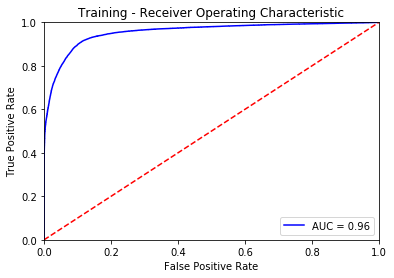

In [122]:
svm_model = SVC(C = c_value, gamma = gamma_value, kernel = 'rbf', probability = True)

kfold_classification(svm_model, X_train, Y_train)

In [123]:
svm_perf = []
svm_perf.append('SVM')
svm_perf.append(0.8839)
svm_perf.append(0.9288)
svm_perf.append(0.8316)
svm_perf.append(0.8775)
svm_perf.append(0.8836)
svm_perf.append(0.9557)

In [126]:
performance_df = pd.DataFrame(columns=['Classifier','Accuracy','Precision','Recall','F1 Score','Weighted F1 Score','AUC'])
performance_df = performance_df.append(pd.Series(svm_perf, index = performance_df.columns), ignore_index = True)
performance_df.head()

Classifier  Accuracy  Precision  Recall  F1 Score  Weighted F1 Score     AUC
0        SVM    0.8839     0.9288  0.8316    0.8775             0.8836  0.9557

### 5.2 Random Forest

In [127]:
#loading X_train and Y_train LE
X_train = pd.read_csv('data/X_train_le.csv')
Y_train = pd.read_csv('data/Y_train_le.csv')

In [128]:
### Random Forest Classifier
n_estimators_list = range(10, 50, 10)

skf_model = StratifiedKFold(n_splits = 3, shuffle = True)

max_iterations = 3
for t in range(0, max_iterations):
    print("---Iteration: ", t)
    AVG_ACC = np.zeros(shape = [len(n_estimators_list)])
    STD_ACC = np.zeros(shape = [len(n_estimators_list)])
    
    x_count = 0
    for k_val in n_estimators_list:
        temp_accuracy_list = []
        
        for train_subset_index, cv_index in skf_model.split(X_train, Y_train):
            df_train_features_subset = X_train.loc[train_subset_index]
            df_train_class_subset = Y_train.loc[train_subset_index]
            df_train_features_cv = X_train.loc[cv_index]
            df_train_class_cv = Y_train.loc[cv_index]
        
            rf_model = RandomForestClassifier(n_estimators = k_val)
            rf_model.fit(df_train_features_subset, df_train_class_subset)
            score_value = rf_model.score(df_train_features_cv, df_train_class_cv)
            temp_accuracy_list.append(score_value)
                
        AVG_ACC[x_count] = np.mean(temp_accuracy_list)
        STD_ACC[x_count] = np.std(temp_accuracy_list)
        x_count += 1
    
    if t == 0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.vstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.vstack([final_STD_ACC, STD_ACC])
    
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis=0)
final_k_index = np.argmax(final_accuracy_mean_list)

chosen_k = n_estimators_list[final_k_index]
print("By Cross Validation - Chosen Number of Estimators for Random Forest Classifier: ", chosen_k)

---Iteration:  0
---Iteration:  1
---Iteration:  2
By Cross Validation - Chosen Number of Estimators for Random Forest Classifier:  40



Confusion Matrix:
  [[27905  1333]
 [ 2451 26787]]

Training Accuracy Score:  0.9352896914973664

Training Precision:  0.9525960170697013

Training Recall:  0.9161707367124974

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     29238
           1       0.95      0.92      0.93     29238

    accuracy                           0.94     58476
   macro avg       0.94      0.94      0.94     58476
weighted avg       0.94      0.94      0.94     58476


Training F1score:  0.9340283831374874

Training Weigted F1score:  0.9352660290020424
\AUC for ROC:  0.9763243797196027


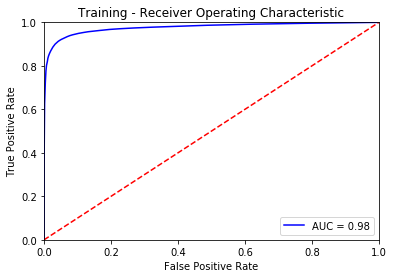

In [129]:
rf_model = RandomForestClassifier(n_estimators = chosen_k)

kfold_classification(rf_model, X_train, Y_train)

In [130]:
rf_perf = []
rf_perf.append('Random Forest')
rf_perf.append(0.9353)
rf_perf.append(0.9526)
rf_perf.append(0.9162)
rf_perf.append(0.9340)
rf_perf.append(0.9353)
rf_perf.append(0.9763)

In [131]:
performance_df = performance_df.append(pd.Series(rf_perf, index = performance_df.columns), ignore_index = True)

### 5.3 Logistic Regression with Linear Features

In [133]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [140]:
C_list = np.linspace(0.1, 1, 5)

skf_model = StratifiedKFold(n_splits = 3, shuffle = True)
poly_features_1 = PolynomialFeatures(degree = 1)

max_iterations = 3
for t in range(0, max_iterations):
    print("---Iteration: ", t)
    AVG_ACC = np.zeros(shape = [len(C_list)])
    STD_ACC = np.zeros(shape = [len(C_list)])
    
    x_count = 0
    for c_value in C_list:
            
        temp_accuracy_list = []
        for train_subset_index, cv_index in skf_model.split(X_train, Y_train):
            df_train_features_subset = X_train.loc[train_subset_index]
            df_train_class_subset = Y_train.loc[train_subset_index]
            df_train_features_cv = X_train.loc[cv_index]
            df_train_class_cv = Y_train.loc[cv_index]
                
            #poly features transform
            df_train_features_subset_poly = poly_features_1.fit_transform(df_train_features_subset)
            df_train_features_cv_poly = poly_features_1.transform(df_train_features_cv)
                
            lr_model = LogisticRegression(C = c_value)
            lr_model.fit(df_train_features_subset_poly, df_train_class_subset)
            score_value = lr_model.score(df_train_features_cv_poly, df_train_class_cv)
            temp_accuracy_list.append(score_value)
            
        AVG_ACC[x_count] = np.mean(temp_accuracy_list)
        STD_ACC[x_count] = np.std(temp_accuracy_list)
            
        x_count += 1
    
    if t == 0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis = 2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis = None), final_accuracy_mean_list.shape)

chosen_C = C_list[max_ind[0]]
print("By Cross Validation - Chosen C for Logistic Regression: ", chosen_C)

---Iteration:  0
---Iteration:  1
---Iteration:  2
By Cross Validation - Chosen C for Logistic Regression:  0.1



Confusion Matrix:
  [[24374  4864]
 [10512 18726]]

Training Accuracy Score:  0.7370545180928928

Training Precision:  0.793810936837643

Training Recall:  0.6404678842602093

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76     29238
           1       0.79      0.64      0.71     29238

    accuracy                           0.74     58476
   macro avg       0.75      0.74      0.73     58476
weighted avg       0.75      0.74      0.73     58476


Training F1score:  0.7089422276065722

Training Weigted F1score:  0.7345784059248006
\AUC for ROC:  0.7977804029074007


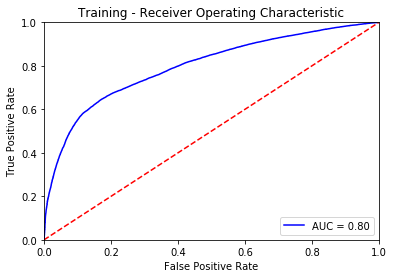

In [144]:
lr1_model = LogisticRegression(C = chosen_C)
lr1_model = Pipeline([('features', poly_features_1), ('clf', lr1_model)])

kfold_classification(lr1_model, X_train, Y_train)

In [145]:
lr_perf = []
lr_perf.append('Logistic Regression')
lr_perf.append(0.7371)
lr_perf.append(0.7938)
lr_perf.append(0.6405)
lr_perf.append(0.7089)
lr_perf.append(0.7346)
lr_perf.append(0.7978)

In [146]:
performance_df = performance_df.append(pd.Series(lr_perf, index = performance_df.columns), ignore_index = True)

### 5.4 Logistic Regression with Polynomial Features of degree 2

In [147]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [148]:
C_list = np.linspace(0.1, 1, 5)

skf_model = StratifiedKFold(n_splits = 3, shuffle = True)
poly_features_2 = PolynomialFeatures(degree = 2)

max_iterations = 3
for t in range(0, max_iterations):
    print("---Iteration: ", t)
    AVG_ACC = np.zeros(shape = [len(C_list)])
    STD_ACC = np.zeros(shape = [len(C_list)])
    
    x_count = 0
    for c_value in C_list:
            
        temp_accuracy_list = []
        for train_subset_index, cv_index in skf_model.split(X_train, Y_train):
            df_train_features_subset = X_train.loc[train_subset_index]
            df_train_class_subset = Y_train.loc[train_subset_index]
            df_train_features_cv = X_train.loc[cv_index]
            df_train_class_cv = Y_train.loc[cv_index]
                
            #poly features transform
            df_train_features_subset_poly = poly_features_2.fit_transform(df_train_features_subset)
            df_train_features_cv_poly = poly_features_2.transform(df_train_features_cv)
                
            lr_model = LogisticRegression(C = c_value)
            lr_model.fit(df_train_features_subset_poly, df_train_class_subset)
            score_value = lr_model.score(df_train_features_cv_poly, df_train_class_cv)
            temp_accuracy_list.append(score_value)
            
        AVG_ACC[x_count] = np.mean(temp_accuracy_list)
        STD_ACC[x_count] = np.std(temp_accuracy_list)
            
        x_count += 1
    
    if t == 0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis = 2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis = None), final_accuracy_mean_list.shape)

chosen_C = C_list[max_ind[0]]
print("By Cross Validation - Chosen C for Logistic Regression: ", chosen_C)

---Iteration:  0
---Iteration:  1
---Iteration:  2
By Cross Validation - Chosen C for Logistic Regression:  0.1



Confusion Matrix:
  [[26606  2632]
 [ 5420 23818]]

Training Accuracy Score:  0.8623024830699775

Training Precision:  0.9004914933837429

Training Recall:  0.8146248033381216

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     29238
           1       0.90      0.81      0.86     29238

    accuracy                           0.86     58476
   macro avg       0.87      0.86      0.86     58476
weighted avg       0.87      0.86      0.86     58476


Training F1score:  0.8554087056457405

Training Weigted F1score:  0.8619887612846094
\AUC for ROC:  0.9299947003993787


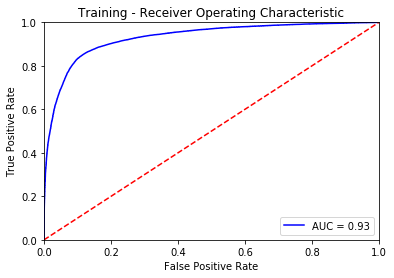

In [149]:
lr2_model = LogisticRegression(C = chosen_C)
lr2_model = Pipeline([('features', poly_features_2), ('clf', lr2_model)])

kfold_classification(lr2_model, X_train, Y_train)

In [150]:
lr2_perf = []
lr2_perf.append('Logistic Regression (poly features degree 2)')
lr2_perf.append(0.8623)
lr2_perf.append(0.9005)
lr2_perf.append(0.8146)
lr2_perf.append(0.8554)
lr2_perf.append(0.8620)
lr2_perf.append(0.9300)

In [151]:
performance_df = performance_df.append(pd.Series(lr2_perf, index = performance_df.columns), ignore_index = True)

### 5.5 Logistic Regression with Polynomial Features of degree 3

In [152]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [153]:
C_list = np.linspace(0.1, 1, 5)

skf_model = StratifiedKFold(n_splits = 3, shuffle = True)
poly_features_3 = PolynomialFeatures(degree = 3)

max_iterations = 3
for t in range(0, max_iterations):
    print("---Iteration: ", t)
    AVG_ACC = np.zeros(shape = [len(C_list)])
    STD_ACC = np.zeros(shape = [len(C_list)])
    
    x_count = 0
    for c_value in C_list:
            
        temp_accuracy_list = []
        for train_subset_index, cv_index in skf_model.split(X_train, Y_train):
            df_train_features_subset = X_train.loc[train_subset_index]
            df_train_class_subset = Y_train.loc[train_subset_index]
            df_train_features_cv = X_train.loc[cv_index]
            df_train_class_cv = Y_train.loc[cv_index]
                
            #poly features transform
            df_train_features_subset_poly = poly_features_3.fit_transform(df_train_features_subset)
            df_train_features_cv_poly = poly_features_3.transform(df_train_features_cv)
                
            lr_model = LogisticRegression(C = c_value)
            lr_model.fit(df_train_features_subset_poly, df_train_class_subset)
            score_value = lr_model.score(df_train_features_cv_poly, df_train_class_cv)
            temp_accuracy_list.append(score_value)
            
        AVG_ACC[x_count] = np.mean(temp_accuracy_list)
        STD_ACC[x_count] = np.std(temp_accuracy_list)
            
        x_count += 1
    
    if t == 0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis = 2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis = None), final_accuracy_mean_list.shape)

chosen_C = C_list[max_ind[0]]
print("By Cross Validation - Chosen C for Logistic Regression: ", chosen_C)

---Iteration:  0
---Iteration:  1
---Iteration:  2
By Cross Validation - Chosen C for Logistic Regression:  0.1



Confusion Matrix:
  [[27306  1932]
 [ 3818 25420]]

Training Accuracy Score:  0.901669060811273

Training Precision:  0.929365311494589

Training Recall:  0.8694165127573705

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     29238
           1       0.93      0.87      0.90     29238

    accuracy                           0.90     58476
   macro avg       0.90      0.90      0.90     58476
weighted avg       0.90      0.90      0.90     58476


Training F1score:  0.8983919420392296

Training Weigted F1score:  0.9015666678156123
\AUC for ROC:  0.9590260339555413


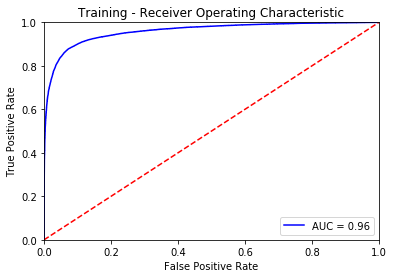

In [154]:
lr3_model = LogisticRegression(C = chosen_C)
lr3_model = Pipeline([('features', poly_features_3), ('clf', lr3_model)])

kfold_classification(lr3_model, X_train, Y_train)

In [155]:
lr3_perf = []
lr3_perf.append('Logistic Regression (poly features degree 3)')
lr3_perf.append(0.9017)
lr3_perf.append(0.9294)
lr3_perf.append(0.8694)
lr3_perf.append(0.8984)
lr3_perf.append(0.9016)
lr3_perf.append(0.9590)

In [156]:
performance_df = performance_df.append(pd.Series(lr3_perf, index = performance_df.columns), ignore_index = True)

### 5.6 XGBoostClassifier

In [157]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [159]:
import xgboost as xgb

In [161]:
param_grid = {
    'max_depth': [3, 5, 7, 9], 
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'max_depth': 9}

In [162]:
param_grid = {
    'max_depth': [9], 
    'min_child_weight': [1, 3, 5, 7], 
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [163]:
param_grid = {
    'max_depth': [9], 
    'min_child_weight': [1], 
    'gamma': [i/10.0 for i in range(0,5)]
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'gamma': 0.3, 'max_depth': 9, 'min_child_weight': 1}

In [164]:
param_grid = {
    'max_depth': [9], 
    'min_child_weight': [1], 
    'gamma': [0.3],
    'subsample': [i/10.0 for i in range(6,10)],
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'gamma': 0.3, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8}

In [165]:
param_grid = {
    'max_depth': [9], 
    'min_child_weight': [1], 
    'gamma': [0.3],
    'subsample': [0.8],
    'colsample_bytree': [i/10.0 for i in range(6,10)]
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 9,
 'min_child_weight': 1,
 'subsample': 0.8}

In [166]:
param_grid = {
    'max_depth': [9], 
    'n_estimators': [50, 80, 100, 200], 
    'min_child_weight': [1], 
    'gamma': [0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.9]
}

xgboost = xgb.XGBClassifier(seed = 42)
gridsearch = GridSearchCV(xgboost, param_grid, cv = 3, n_jobs=-1)
gridsearch.fit(X_train, Y_train).best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.8}


Confusion Matrix:
  [[28218  1020]
 [ 2567 26671]]

Training Accuracy Score:  0.9386585949791367

Training Precision:  0.9631649272326749

Training Recall:  0.9122032970791436

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     29238
           1       0.96      0.91      0.94     29238

    accuracy                           0.94     58476
   macro avg       0.94      0.94      0.94     58476
weighted avg       0.94      0.94      0.94     58476


Training F1score:  0.9369916914050836

Training Weigted F1score:  0.9386156331173662
\AUC for ROC:  0.9759972930745892


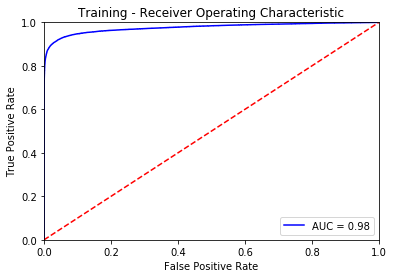

In [167]:
xgboost_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 9, subsample = 0.8, min_child_weight = 1, gamma = 0.3, colsample_bytree = 0.9)

kfold_classification(xgboost_model, X_train, Y_train)

In [168]:
xgb_perf = []
xgb_perf.append('XGBoost')
xgb_perf.append(0.9387)
xgb_perf.append(0.9632)
xgb_perf.append(0.9122)
xgb_perf.append(0.9370)
xgb_perf.append(0.9386)
xgb_perf.append(0.9760)

In [169]:
performance_df = performance_df.append(pd.Series(xgb_perf, index = performance_df.columns), ignore_index = True)

### 5.7 Gradient Boosting Classifier

In [170]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [172]:
#hyperparameter tuning with gridsearch CV for gradient boosting
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 8],
    'subsample': [0.5, 0.7, 0.9, 1.0]
}

gboost = GradientBoostingClassifier()
grid = GridSearchCV(gboost, param_grid, cv = 3, n_jobs=-1)
grid.fit(X_train, Y_train).best_params_

{'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}


Confusion Matrix:
  [[28203  1035]
 [ 2473 26765]]

Training Accuracy Score:  0.9400095765784253

Training Precision:  0.9627697841726619

Training Recall:  0.9154182912647923

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     29238
           1       0.96      0.92      0.94     29238

    accuracy                           0.94     58476
   macro avg       0.94      0.94      0.94     58476
weighted avg       0.94      0.94      0.94     58476


Training F1score:  0.9384971422560398

Training Weigted F1score:  0.9399732765391091
\AUC for ROC:  0.9748479186041461


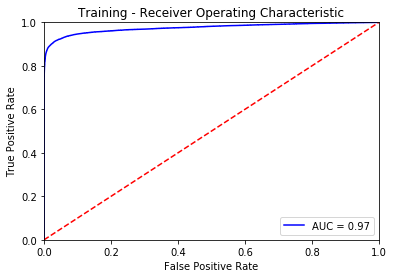

In [173]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 8, subsample = 0.9)

kfold_classification(gboost_model, X_train, Y_train)

In [174]:
gb_perf = []
gb_perf.append('Gradient Boosting')
gb_perf.append(0.9400)
gb_perf.append(0.9628)
gb_perf.append(0.9154)
gb_perf.append(0.9385)
gb_perf.append(0.9400)
gb_perf.append(0.9748)

In [175]:
performance_df = performance_df.append(pd.Series(gb_perf, index = performance_df.columns), ignore_index = True)

### 5.8 AdaBoost

In [176]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

In [179]:
param_grid = {
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1]
}

ada = AdaBoostClassifier()
search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs=-1)

search.fit(X_train, Y_train).best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}


Confusion Matrix:
  [[27035  2203]
 [ 4545 24693]]

Training Accuracy Score:  0.8846022299746905

Training Precision:  0.9180919095776323

Training Recall:  0.8445516109172994

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     29238
           1       0.92      0.84      0.88     29238

    accuracy                           0.88     58476
   macro avg       0.89      0.88      0.88     58476
weighted avg       0.89      0.88      0.88     58476


Training F1score:  0.8797876509780168

Training Weigted F1score:  0.8844168285473135
\AUC for ROC:  0.9515312357741433


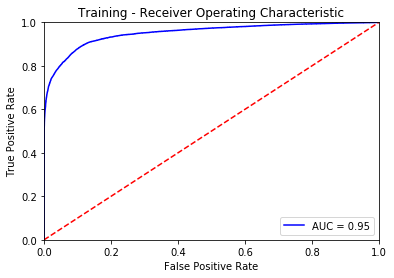

In [180]:
ada_model = AdaBoostClassifier(n_estimators = 2000, learning_rate = 0.1)

kfold_classification(ada_model, X_train, Y_train)

In [181]:
ada_perf = []
ada_perf.append('Ada Boost')
ada_perf.append(0.8846)
ada_perf.append(0.9181)
ada_perf.append(0.8446)
ada_perf.append(0.8798)
ada_perf.append(0.8844)
ada_perf.append(0.9515)

In [182]:
performance_df = performance_df.append(pd.Series(ada_perf, index = performance_df.columns), ignore_index = True)

## 6. Model Performance Comparison resulting from K-Fold Cross Validation on the Training Set

In [187]:
performance_df

Classifier  Accuracy  Precision  Recall  \
0                                           SVM    0.8839     0.9288  0.8316   
1                                 Random Forest    0.9353     0.9526  0.9162   
2                           Logistic Regression    0.7371     0.7938  0.6405   
3  Logistic Regression (poly features degree 2)    0.8623     0.9005  0.8146   
4  Logistic Regression (poly features degree 3)    0.9017     0.9294  0.8694   
5                                       XGBoost    0.9387     0.9632  0.9122   
6                             Gradient Boosting    0.9400     0.9628  0.9154   
7                                     Ada Boost    0.8846     0.9181  0.8446   

   F1 Score  Weighted F1 Score     AUC  
0    0.8775             0.8836  0.9557  
1    0.9340             0.9353  0.9763  
2    0.7089             0.7346  0.7978  
3    0.8554             0.8620  0.9300  
4    0.8984             0.9016  0.9590  
5    0.9370             0.9386  0.9760  
6    0.9385             0.9400  0.9748  
7    0.8798             0.8844  0.9515

In [194]:
print('Index of classifier with maximum AUC: ', performance_df.AUC.idxmax())
print('Index of classifier with maximum Weighted F1: ',performance_df['Weighted F1 Score'].idxmax())
print('Index of classifier with maximum F1: ',performance_df['F1 Score'].idxmax())
print('Index of classifier with maximum Accuracy: ',performance_df['Accuracy'].idxmax())
print('Index of classifier with maximum Precision: ',performance_df['Precision'].idxmax())
print('Index of classifier with maximum Recall: ',performance_df['Recall'].idxmax())

Index of classifier with maximum AUC:  1
Index of classifier with maximum Weighted F1:  6
Index of classifier with maximum F1:  6
Index of classifier with maximum Accuracy:  6
Index of classifier with maximum Precision:  5
Index of classifier with maximum Recall:  1


From the above, depending on the metric used to determine performance, 3 different models prove to be effective: Random Forest, XGBoost and Gradient Boosting.

Given that we are predicting class labels ('yes' or 'no'), and the positive class is more important as we want to know if a customer will sign up ('yes'), the metric that we will go by is F1. By the F1 score, the best performing model is Gradient Boosting. Therefore, this classifier will now be trained on all of the train data and the test set will be used to make predictions. 

## 7. Building the Final Model and Making Predictions on the Test Set

In [208]:
#loading X_train and Y_train OHE
X_train = pd.read_csv('data/X_train_ohe.csv')
Y_train = pd.read_csv('data/Y_train_ohe.csv')

#loading X_test and Y_test OHE
X_test = pd.read_csv('data/X_test_ohe.csv')
Y_test = pd.read_csv('data/Y_test_ohe.csv')

In [209]:
final_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 8, subsample = 0.9)
final_model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [198]:
import pickle

#save model
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [210]:
predictions = final_model.predict(X_test)

In [211]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[7077  233]
 [ 590  338]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.59      0.36      0.45       928

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



Overall accuracy on the unseen test set is high (90%), however, the model is not particularly good at predicting the positive ('yes') responses. This is to be expected given the unbalanced nature of the dataset (significantly more no responses compared to yes responses) and that the model was trained on data where the positive responses were synthetically enhanced. 

To try to improve the accuracy in predicting the positive responses, an attempt could be made on training the model with the unbalanced dataset, although given the small number of yes responses, the risk is that the model will predict no all the time. An alternative would be to partially enhance the data by increasing the positive responses synthetically but not to the point that they are perfecly balanced.

## 8. Important Features

We can now look at the features that are important in predicting the customer response.

In [217]:
def plot_feature_importances(model):
    '''
    Visualization for feature importance
    '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

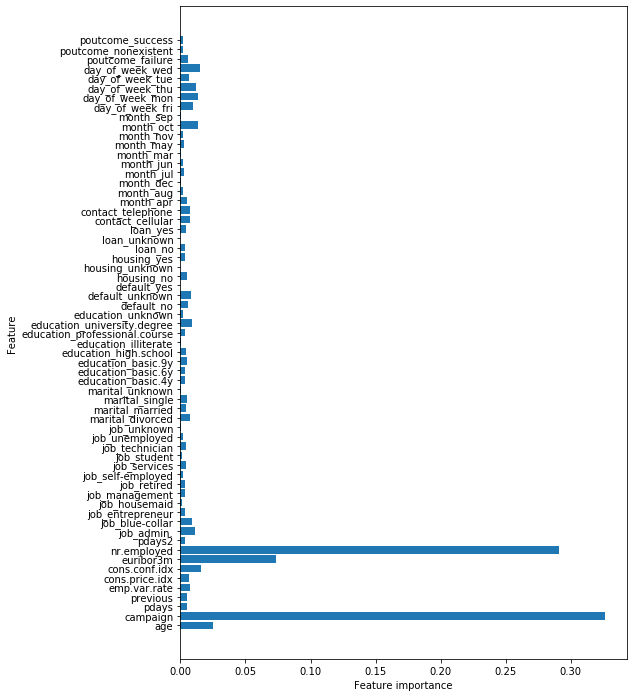

In [218]:
plot_feature_importances(final_model)

From the above plot, it is clear that the following customer features are especially important in predicting a customer response to the bank telemartketing campaign:
+ campaign
+ nr. employed
+ euribor3m

Therefore, the number of contacts performed during this campaign and for this client, the number of employees, and the euribor 3 month rate are important in determining if a customer will respond yes or no to the campaign.